Notebook to build a graph (users, posts). A user is linked to a post $\iff$ this user has interacted with (commented) the post.

- could be interesting to see "left leaning" and "right leaning posts", and colorize the sentiment of people linked to these posts, to see if there is a difference.
- link to a post bigger if more interactions

In [2]:
repo_root = "../"
import sys
sys.path.append(repo_root)

In [3]:
import pandas as pd
import networkx as nx
from datetime import datetime
from parse_csv_files import parse_tiktok_comments

Look how many people have interacted with multiple posts on TikTok:

In [5]:
#METTRE A JOUR AVEC LES NOUVELLES COLONNES !!! (faut que je modifie les read_csv qui sont encore sur l'ancien, d'ailleurs)

filename = "../results/TikTok-comments_18-11-2024_12h46.csv"
tiktok = parse_tiktok_comments(filename)

In [23]:
tiktok.dtypes

Comment Number (ID)              int64
Nickname                        object
User @                          object
User URL                        object
Comment Text                    object
Time                    datetime64[ns]
Likes                           object
Profile Picture URL             object
Is 2nd Level Comment            object
User Replied To                 object
Number of Replies                int64
post_url                        object
shown_comments                   int64
scraped_comments                 int64
difference                       int64
publisher                       object
post_likes                      object
post_shares                     object
post_description                object
date_scraped                    object
dtype: object

In [6]:
interactions = tiktok[["User @","post_url"]]

In [7]:
interactions.head(10)

,User @,post_url
0,johnm319,https://www.tiktok.com/@jaketapper/video/73945...
1,shhhleb,https://www.tiktok.com/@jaketapper/video/73945...
2,carolinetvardy6,https://www.tiktok.com/@jaketapper/video/73945...
3,sofiam444_,https://www.tiktok.com/@jaketapper/video/73945...
4,meagan.with.an.a,https://www.tiktok.com/@jaketapper/video/73945...
5,kelbelcour,https://www.tiktok.com/@jaketapper/video/73945...
6,960aeiididididjdjcjfi,https://www.tiktok.com/@jaketapper/video/73945...
7,be.erika,https://www.tiktok.com/@jaketapper/video/73945...
8,rejectedun1corn,https://www.tiktok.com/@jaketapper/video/73945...
9,npawlic,https://www.tiktok.com/@jaketapper/video/73945...


In [11]:
interactions.groupby(['User @', 'post_url'], as_index = False).agg(nb_interactions_on_post = ("post_url", 'count')).sort_values(by="nb_interactions_on_post")

,User @,post_url,nb_interactions_on_post
0,.....toasty,https://www.tiktok.com/@jaketapper/video/73945...,1
9392,mollyspamacount,https://www.tiktok.com/@reals.nas/video/740484...,1
9393,mollyy_jones,https://www.tiktok.com/@reals.nas/video/740484...,1
9395,mom.4.lisa.wellman,https://www.tiktok.com/@kamalahq/photo/7394598...,1
9396,mom.on.the.move,https://www.tiktok.com/@athanchekas/video/7394...,1
...,...,...,...
11034,reals.nas,https://www.tiktok.com/@reals.nas/video/740484...,7
3643,despicablearts_,https://www.tiktok.com/@mebbytoks/video/739415...,8
5619,homoemo,https://www.tiktok.com/@shitindiedisco/video/7...,10
11637,schfrsgf,https://www.tiktok.com/@schfrsgf/video/7395642...,14


In [19]:
#tiktok[tiktok['User @'] == "homoemo"]#["post_url"].iloc[0]

Pour tiktok, c'est un peu nul: soit ce sont des créateurs qui répondent sous leurs propres posts, soit ce sont des gens qui discutente en commentaires.... Mais très peu de gens qui commentent effectivement sur 2 ou + posts tiktok.

# YouTube

Peut-être plus intéressant pour cela. D'autant plus que l'API permet ensuite d'aller chercher tous les comms de chaque utilisateur.

In [21]:
youtube = pd.read_csv("../results/youtube_comments.csv")


In [25]:
yt_interactions = youtube[["Username", "VideoID"]]
interactions_per_video = yt_interactions.groupby(["Username", "VideoID"], as_index = False).agg(nb_interactions_on_post = ("VideoID", 'count')).sort_values(by="nb_interactions_on_post")

In [28]:
noname = interactions_per_video.groupby(["Username"], as_index = False).agg(nb_interacted_videos = ("VideoID", 'count')).sort_values(by="nb_interacted_videos")

In [30]:
noname[noname["nb_interacted_videos"] > 1].describe() 
# 141 personnes ont commenté sur au moins 2 vidéos.
# En moyenne 2 posts distincts

,nb_interacted_videos
count,141.000000
mean,2.092199
std,0.335957
min,2.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,4.000000


# Let's build a graph !

In [41]:
d = {} #user:post dictionary.

edges={} #user,post:nb of interactions

for i,el in yt_interactions.iterrows():
    username, videoID = el["Username"], el["VideoID"]

    edges[username,videoID] = edges.get((username,videoID), 0) + 1


#edges

G = nx.Graph()
G.add_edges_from(edges)

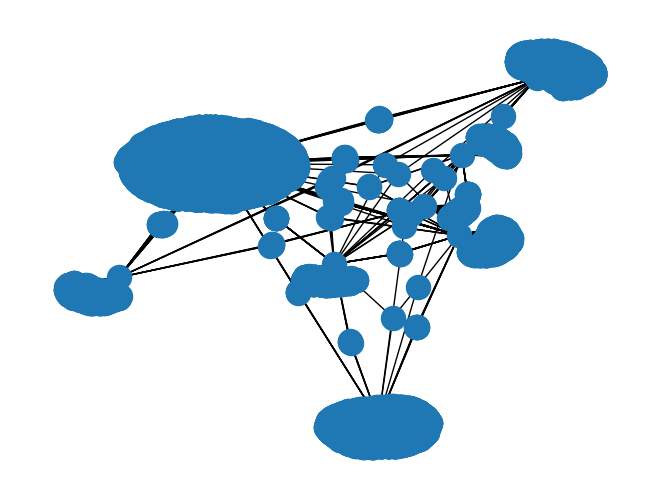

In [43]:
import matplotlib.pyplot as plt
nx.draw(G, with_labels=False, font_weight='bold')